`Importing the important modules`

In [27]:
import string
import pandas as pd
import time

## import modules for NLP
import nltk
from nltk.corpus import stopwords

## import the modules for train & test data
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

## word2vec with gensim; press pip install -U gensim before importing
import gensim

`loading, viewing & preprocessing`

In [2]:
train_path = r"C:\Users\Admin\Desktop\Nhan_pro\Data\project_kaggle_data\NLP tweet\train.csv"
test_path = r"C:\Users\Admin\Desktop\Nhan_pro\Data\project_kaggle_data\NLP tweet\test.csv"

train_df = pd.read_csv(train_path, usecols = ["text", "target"])
test_df = pd.read_csv(test_path, usecols = ["id", "text"])

print("col_names : " + train_df.columns)
print('\n')
print("Data-dimensions:" + '\t' + str(train_df.shape))
print('\n')
print("Count the not-null values of each features: \n" + str(train_df.notnull().sum()))

train_df.drop_duplicates(inplace = True)
print("The new dimension after checking duplicate & removing is:\t" + str(train_df.shape))

train_df['Text_length'] = train_df['text'].str.len()
train_df['Numb_words'] = train_df['text'].str.split().map(lambda x: len(x))
train_df.head()

Index(['col_names : text', 'col_names : target'], dtype='object')


Data-dimensions:	(7613, 2)


Count the not-null values of each features: 
text      7613
target    7613
dtype: int64
The new dimension after checking duplicate & removing is:	(7521, 2)


,text,target,Text_length,Numb_words
0,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,Forest fire near La Ronge Sask. Canada,1,38,7
2,All residents asked to 'shelter in place' are ...,1,133,22
3,"13,000 people receive #wildfires evacuation or...",1,65,8
4,Just got sent this photo from Ruby #Alaska as ...,1,88,16


`assigning variables before spliting into train-test dataset`

In [3]:
y = train_df.target.to_numpy()
X = train_df[['text', 'Text_length']]

test_df['Text_length'] = test_df['text'].str.len()
test_df['Numb_words'] = test_df['text'].str.split().map(lambda x: len(x))

### 2. Now, then is **`Deep learning`** with `keras`

First, let see the input dimension.

In [4]:
train_df['Numb_words'].max()

31

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.text import one_hot


test_size = 0.25
text = list(train_df['text'])
vocab_size = 20000

encoded_docs = [one_hot(d, vocab_size) for d in text]
print(encoded_docs[:10])

[[16970, 7278, 17673, 5378, 5216, 18164, 9345, 3, 19607, 881, 10387, 19663, 19857], [10156, 12971, 358, 8957, 10997, 822, 719], [19857, 3105, 226, 10653, 18991, 1549, 7169, 17673, 3430, 1907, 14383, 17717, 12276, 131, 1052, 6884, 17994, 1549, 745, 6736, 17673, 11399], [1231, 9301, 10079, 3130, 216, 1052, 6736, 1549, 11050], [8342, 10293, 2993, 9345, 6742, 14743, 7286, 2336, 9328, 2053, 14743, 216, 4998, 15825, 19115, 12653], [13823, 14800, 11050, 9963, 12169, 18094, 1549, 9444, 18400, 17012, 10653, 6391, 14085, 12971, 1962, 216], [2974, 156, 11423, 3127, 5367, 12847, 7318, 18164, 7343, 1549, 10785, 19619, 15916, 4660], [2280, 15821, 5249, 18164, 5378, 10627, 5327, 2634, 4051, 409, 19115, 12971, 1549, 5378, 10478], [2185, 15786, 6090, 1052, 6283, 13164, 1549, 5378, 5728, 8371, 5378, 14712], [2280, 16244, 19327, 5378, 570, 320, 6234, 10653, 16970, 12329]]


Using TensorFlow backend.


In [6]:
max_length = 32
embedding_dim = 32
trunc_type='post'

padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

print(padded_docs)
padded_docs.shape

[[16970  7278 17673 ...     0     0     0]
 [10156 12971   358 ...     0     0     0]
 [19857  3105   226 ...     0     0     0]
 ...
 [17024 11724 13160 ...     0     0     0]
 [19481 16763 15677 ...     0     0     0]
 [ 5378 15858  1150 ...     0     0     0]]


(7521, 32)

### 2.1. Using basic `Deep-learning` to predict the model

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import layers
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D, MaxPooling1D

x_train, x_test, y_train, y_test = train_test_split(padded_docs, y, test_size=test_size, 
                                                    stratify = y, random_state = 12)

model = Sequential()
model.add(Embedding(vocab_size, 120, input_length=max_length))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 32, 120)           2400000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 120)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3840)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3841      
Total params: 2,403,841
Trainable params: 2,403,841
Non-trainable params: 0
_________________________________________________________________


https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [15]:
history = model.fit(x_train, y_train, 
                    epochs = 5, batch_size = 128,
                    verbose = 2, validation_data = (x_test, y_test))

C:\Users\Admin\.conda\envs\projecy\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 5640 samples, validate on 1881 samples
Epoch 1/5
 - 1s - loss: 0.6624 - acc: 0.6080 - val_loss: 0.6306 - val_acc: 0.6784
Epoch 2/5
 - 0s - loss: 0.5501 - acc: 0.7883 - val_loss: 0.5357 - val_acc: 0.7682
Epoch 3/5
 - 0s - loss: 0.3976 - acc: 0.8715 - val_loss: 0.4708 - val_acc: 0.7889
Epoch 4/5
 - 0s - loss: 0.2683 - acc: 0.9234 - val_loss: 0.4451 - val_acc: 0.7980
Epoch 5/5
 - 0s - loss: 0.1807 - acc: 0.9550 - val_loss: 0.4408 - val_acc: 0.8065


In [16]:
score, tr_acc = model.evaluate(x_train, y_train)
score, t_acc = model.evaluate(x_test, y_test)

print('Train accuracy:', tr_acc)
print('Test accuracy:', t_acc)

#plot_history_1(history)

1881/1881 [==============================] - 0s 45us/step
Train accuracy: 0.9703900814056396
Test accuracy: 0.8064858913421631


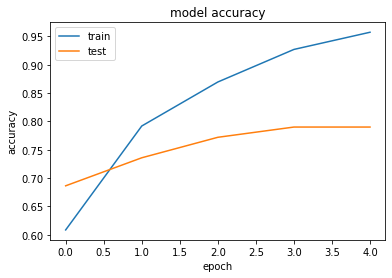

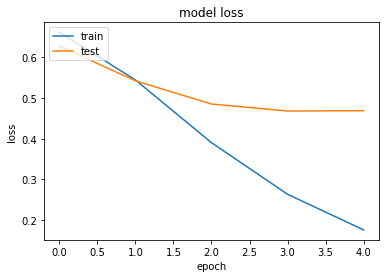

In [10]:
# For ploting the results 
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

**Using `Word2Vec`**

In [37]:
# Word2vec model for embeddings  
from gensim.models import Word2Vec
# For extracting pre-trained vectors  
from gensim.models import KeyedVectors
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

import re  # For preprocessing
import spacy  # For preprocessing

from time import time  # To time our operations
from collections import defaultdict  # For word frequency

from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

sentences = train_df['text']

from tqdm import tqdm
from nltk.tokenize import word_tokenize

stop = set(stopwords.words('english'))

## nltk.download('stopwords') and nltk.download('punkt') before running

def create_corpus(data):
    corpus=[]
    for tweet in tqdm(data['text']):
        words = [word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        corpus.append(words)
    return corpus

corpus=create_corpus(train_df)

100%|██████████| 7521/7521 [00:01<00:00, 5536.80it/s]


In [56]:
MAX_LEN = 32
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [57]:
word_index = tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 15015


In [58]:
import numpy as np

embedding_dict={}
with open(r"D:\Nhan\glove.6B.100d.txt", 'r', encoding='utf8', errors='ignore') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], 'float32')
        embedding_dict[word]=vectors
f.close()

In [59]:
num_words = len(word_index)+1
embedding_matrix = np.zeros((num_words, 100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i] = emb_vec

100%|██████████| 15015/15015 [00:00<00:00, 537052.61it/s]


training the new model

In [60]:
model=Sequential()

embedding=Embedding(num_words, 100, embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.1))
model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 32, 100)           1501600   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 32, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 1,543,905
Trainable params: 42,305
Non-trainable params: 1,501,600
_________________________________________________________________


In [61]:
X_train, X_test,y_train,y_test = train_test_split(tweet_pad, y, test_size = 0.25)
print('Shape of train', X_train.shape)
print("Shape of Validation ", X_test.shape)

Shape of train (5640, 32)
Shape of Validation  (1881, 32)


In [63]:
history = model.fit(X_train, y_train, batch_size = 128, epochs = 5, validation_data = (X_test, y_test), verbose=2)

score, tr_acc = model.evaluate(X_train, y_train)
score, t_acc = model.evaluate(X_test, y_test)

print('Train accuracy:', tr_acc)
print('Test accuracy:', t_acc)

Train on 5640 samples, validate on 1881 samples
Epoch 1/5
 - 1s - loss: 0.4371 - accuracy: 0.8089 - val_loss: 0.4393 - val_accuracy: 0.8028
Epoch 2/5
 - 1s - loss: 0.4309 - accuracy: 0.8080 - val_loss: 0.4286 - val_accuracy: 0.8033
Epoch 3/5
 - 1s - loss: 0.4267 - accuracy: 0.8119 - val_loss: 0.4258 - val_accuracy: 0.8081
Epoch 4/5
 - 1s - loss: 0.4211 - accuracy: 0.8160 - val_loss: 0.4265 - val_accuracy: 0.8091
Epoch 5/5
 - 1s - loss: 0.4175 - accuracy: 0.8174 - val_loss: 0.4276 - val_accuracy: 0.8123
1881/1881 [==============================] - 0s 166us/step
Train accuracy: 0.8381205797195435
Test accuracy: 0.812333881855011


In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [71]:
X_train, X_test,y_train,y_test = train_test_split(tweet_pad, y, test_size = 0.25, random_state = 12)

model=Sequential()

embedding=Embedding(num_words, 100, embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.1))
model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
model.summary()

history = model.fit(X_train, y_train, batch_size = 64, epochs = 13, validation_data = (X_test, y_test), verbose=2)

score, tr_acc = model.evaluate(X_train, y_train)
score, t_acc = model.evaluate(X_test, y_test)

print('Train accuracy:', tr_acc)
print('Test accuracy:', t_acc)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 32, 100)           1501600   
_________________________________________________________________
spatial_dropout1d_11 (Spatia (None, 32, 100)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                42240     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 1,543,905
Trainable params: 42,305
Non-trainable params: 1,501,600
_________________________________________________________________
Train on 5640 samples, validate on 1881 samples
Epoch 1/13
 - 2s - loss: 0.5468 - acc: 0.7305 - val_loss: 0.4713 - val_acc: 0.7905
Epoch 2/13
 - 2s - loss: 0.4773 - acc: 0.7872 - val_loss: 0.4578 - val_acc: 0.8123
Epoch 3/13
 - 2s - los

## using another dataset : `spam.csv`

In [75]:
new_df = pd.read_csv(r"C:\Users\Admin\Desktop\Nhan_pro\Data\ML\spam.csv", usecols = ['text_mes', 'target'], encoding='ISO-8859-1')
new_df.head(6)

,target,text_mes
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...


In [76]:
new_df['Numb_words'] = new_df['text_mes'].str.split().map(lambda x: len(x))
new_df['Numb_words'].max()

171

In [78]:
def create_corpus(data):
    corpus=[]
    for tweet in tqdm(data['text_mes']):
        words = [word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        corpus.append(words)
    return corpus

corpus=create_corpus(new_df)

MAX_LEN = 171
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)
tweet_pad=pad_sequences(sequences, maxlen=MAX_LEN, truncating='post',padding='post')

100%|██████████| 5572/5572 [00:00<00:00, 5671.99it/s]


In [94]:
word_index = tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

embedding_dict={}
with open(r"D:\Nhan\glove.6B.50d.txt", 'r', encoding='utf8', errors='ignore') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], 'float32')
        embedding_dict[word]=vectors
f.close()

num_words = len(word_index)+1
embedding_matrix = np.zeros((num_words, 50))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i] = emb_vec
        
model=Sequential()

embedding=Embedding(num_words, 50, embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.1))
model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
model.summary()

Number of unique words: 7176


100%|██████████| 7176/7176 [00:00<00:00, 654183.43it/s]


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 171, 50)           358850    
_________________________________________________________________
spatial_dropout1d_14 (Spatia (None, 171, 50)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 64)                29440     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 65        
Total params: 388,355
Trainable params: 29,505
Non-trainable params: 358,850
_________________________________________________________________


In [84]:
new_y = new_df['target'].replace({'ham': 0, 'spam': 1})
new_y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int64

In [105]:
X_train, X_test,y_train, y_test = train_test_split(tweet_pad, new_y, test_size = 0.3, random_state = 42)

history = model.fit(X_train, y_train, batch_size = 128, epochs = 15, validation_data = (X_test, y_test), verbose=0)

In [106]:
print('Train accuracy:', tr_acc)
print('Test accuracy:', t_acc)

Train accuracy: 0.9993846383094788
Test accuracy: 0.9917248721122742
